# Flatiron School: Use your regression skills to save the Galaxy

### InClass prediction Competition

### Table of Contents
<a id='Table of contents'></a>

### <a href='#1. Obtaining and Viewing the Data'> 1. Obtaining and Viewing the Data </a>
* <a href='#1.1. Test Data'> 1.1. Test Data </a>
* <a href='#1.2. Train Data'> 1.2. Train Data </a>

### <a href='#2. Preprocessing the Data'> 2. Preprocessing the Data </a>
* <a href='#2.1. Handling Genre column'> 2.1. Handling Genre column </a>
* <a href='#2.2. Handling Rating column'> 2.2. Handling Rating column</a>
* <a href='#2.3. Handling Year_of_Release column'> 2.3. Handling Year_of_Release column </a>
* <a href='#2.4. Handling User and Critic related columns'> 2.4. Handling User and Critic related columns </a>
* <a href='#2.5. Handling Platform column'> 2.5. Handling Platform column </a>

### <a href='#3. Modeling the Train Data'> 3. Modeling the Train Data </a>

### <a href='#4. Predicting on Test Set'> 4. Predicting on Test Set </a>

### 1. Obtaining and Viewing the Data 
<a id='1. Obtaining and Viewing the Data'></a>

In [93]:
# import libraries 
import pandas as pd
import numpy as np
import xgboost as xgb

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

**1.1. Test Data**
<a id='1.1. Test Data'></a>

In [94]:
df_test = pd.read_csv('test.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 12 columns):
Id                 5016 non-null int64
Platform           5016 non-null object
Year_of_Release    4930 non-null float64
Genre              5016 non-null object
Publisher          5001 non-null object
JP_Sales           5016 non-null float64
Critic_Score       2440 non-null float64
Critic_Count       2440 non-null float64
User_Score         3004 non-null object
User_Count         2258 non-null float64
Developer          3030 non-null object
Rating             2972 non-null object
dtypes: float64(5), int64(1), object(6)
memory usage: 470.3+ KB


In [95]:
df_test.head(2)

,Id,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,11703,GB,1996.0,Role-Playing,Nintendo,10.22,NaN,NaN,NaN,NaN,NaN,NaN
1,11704,Wii,2006.0,Misc,Nintendo,2.93,58.0,41.0,6.6,129.0,Nintendo,E


In [96]:
df_test.isna().sum()/len(df_test)

Id                 0.000000
Platform           0.000000
Year_of_Release    0.017145
Genre              0.000000
Publisher          0.002990
JP_Sales           0.000000
Critic_Score       0.513557
Critic_Count       0.513557
User_Score         0.401116
User_Count         0.549841
Developer          0.395933
Rating             0.407496
dtype: float64

In [97]:
# why is user score stored as string?
df_test.User_Score.unique()

array([nan, '6.6', '8.2', '7.9', '8.7', '3.4', '6.4', '7.5', '7.4', '7.6',
       '8.3', 'tbd', '4.3', '9', '8.8', '7.1', '8.1', '5.7', '8.9', '6.1',
       '7.2', '8', '5.4', '8.6', '9.2', '8.5', '9.1', '4.8', '4.5', '4.2',
       '7.3', '8.4', '6', '6.3', '6.7', '3.7', '5.6', '5.5', '4.4', '4.6',
       '7.7', '6.5', '7.8', '6.8', '7', '6.2', '6.9', '5', '4.1', '5.1',
       '2.5', '3.1', '5.8', '2.2', '5.9', '9.3', '3.5', '9.4', '9.5',
       '2.6', '3.3', '5.3', '2.8', '3.8', '4.9', '3.6', '3', '4', '4.7',
       '5.2', '3.2', '2.7', '1.1', '1.7', '3.9', '2', '2.9', '1.5', '1.2',
       '9.6', '1.8', '2.1', '2.4', '0.9', '1.3', '0.3', '0.2', '0.6',
       '1.4'], dtype=object)

In [98]:
# replace 'tbd'
df_test['User_Score'].replace(to_replace='tbd', value=np.nan, inplace=True)
# convert string values into numeric values
df_test['User_Score'] = pd.to_numeric(df_test['User_Score'])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 12 columns):
Id                 5016 non-null int64
Platform           5016 non-null object
Year_of_Release    4930 non-null float64
Genre              5016 non-null object
Publisher          5001 non-null object
JP_Sales           5016 non-null float64
Critic_Score       2440 non-null float64
Critic_Count       2440 non-null float64
User_Score         2258 non-null float64
User_Count         2258 non-null float64
Developer          3030 non-null object
Rating             2972 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 470.3+ KB


In [99]:
df_test.duplicated().sum()

0

**1.2. Train Data**
<a id='1.2. Train Data'></a>

In [100]:
df_train = pd.read_csv('train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11703 entries, 0 to 11702
Data columns (total 13 columns):
Id                 11703 non-null int64
NA_Sales           11703 non-null float64
Platform           11703 non-null object
Year_of_Release    11520 non-null float64
Genre              11701 non-null object
Publisher          11664 non-null object
JP_Sales           11703 non-null float64
Critic_Score       5697 non-null float64
Critic_Count       5697 non-null float64
User_Score         7011 non-null object
User_Count         5332 non-null float64
Developer          7066 non-null object
Rating             6978 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 1.2+ MB


In [101]:
df_train.head(2)

,Id,NA_Sales,Platform,Year_of_Release,Genre,Publisher,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,0.00,PSP,2008.0,Misc,Sony Computer Entertainment,0.06,81.0,49.0,8.3,62.0,SCE Japan Studio,E
1,1,0.72,2600,1982.0,Shooter,Atari,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
df_train.isna().sum()/len(df_train)

Id                 0.000000
NA_Sales           0.000000
Platform           0.000000
Year_of_Release    0.015637
Genre              0.000171
Publisher          0.003332
JP_Sales           0.000000
Critic_Score       0.513202
Critic_Count       0.513202
User_Score         0.400923
User_Count         0.544390
Developer          0.396223
Rating             0.403743
dtype: float64

In [103]:
# replace 'tbd'
df_train['User_Score'].replace(to_replace='tbd', value=np.nan, inplace=True)

# convert string values into numeric values
df_train['User_Score'] = pd.to_numeric(df_train['User_Score'])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11703 entries, 0 to 11702
Data columns (total 13 columns):
Id                 11703 non-null int64
NA_Sales           11703 non-null float64
Platform           11703 non-null object
Year_of_Release    11520 non-null float64
Genre              11701 non-null object
Publisher          11664 non-null object
JP_Sales           11703 non-null float64
Critic_Score       5697 non-null float64
Critic_Count       5697 non-null float64
User_Score         5332 non-null float64
User_Count         5332 non-null float64
Developer          7066 non-null object
Rating             6978 non-null object
dtypes: float64(7), int64(1), object(5)
memory usage: 1.2+ MB


In [104]:
df_train.duplicated().sum()

0

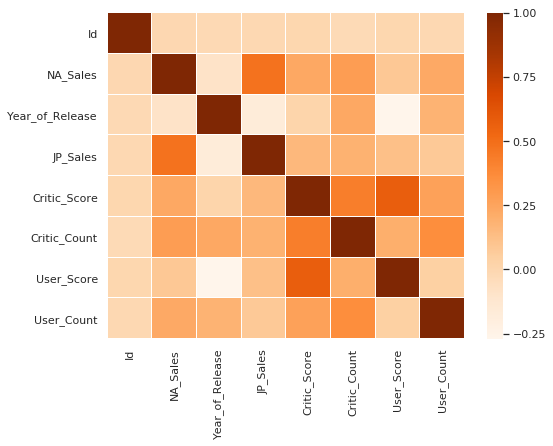

In [105]:
plt.subplots(figsize=(8, 6))
sns.heatmap(df_train.corr(), cmap="Oranges", linewidths=0.1);

As the columns `Publisher` and `Developer` contain way too many values and also doesn't seem to add any reasonable value to our prediction, let's drop them.

In [106]:
df_train = df_train.drop(['Publisher', 'Developer'], axis=1)
df_test  = df_test.drop(['Publisher', 'Developer'], axis=1)

*Back to: <a href='#Table of contents'> Table of contents</a>*
### 2. Preprocessing the Data 
<a id='2. Preprocessing the Data'></a>

**2.1. Handling `Genre` column**
<a id='2.1. Handling Genre column'></a>

*Train Data*

In [107]:
print('Train Data:')
print('-----------')
df_train.info()

Train Data:
-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11703 entries, 0 to 11702
Data columns (total 11 columns):
Id                 11703 non-null int64
NA_Sales           11703 non-null float64
Platform           11703 non-null object
Year_of_Release    11520 non-null float64
Genre              11701 non-null object
JP_Sales           11703 non-null float64
Critic_Score       5697 non-null float64
Critic_Count       5697 non-null float64
User_Score         5332 non-null float64
User_Count         5332 non-null float64
Rating             6978 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 1005.8+ KB


We only face 2 records with a missing value in the `Genre` column - let's drop both:

In [108]:
df_train = df_train.dropna(subset=['Genre'])
df_train.Genre.value_counts()

Action          2354
Sports          1633
Misc            1233
Role-Playing    1082
Shooter          922
Adventure        913
Racing           891
Simulation       627
Platform         592
Fighting         567
Strategy         477
Puzzle           410
Name: Genre, dtype: int64

*Test Data*

In [109]:
print('Test Data:')
print('----------')
df_test.info()

Test Data:
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 10 columns):
Id                 5016 non-null int64
Platform           5016 non-null object
Year_of_Release    4930 non-null float64
Genre              5016 non-null object
JP_Sales           5016 non-null float64
Critic_Score       2440 non-null float64
Critic_Count       2440 non-null float64
User_Score         2258 non-null float64
User_Count         2258 non-null float64
Rating             2972 non-null object
dtypes: float64(6), int64(1), object(3)
memory usage: 392.0+ KB


No missing values in `Genre` at all, lucky we!

In [110]:
df_test.Genre.value_counts()

Action          1016
Sports           715
Misc             517
Role-Playing     418
Shooter          401
Adventure        390
Racing           358
Platform         296
Fighting         282
Simulation       247
Strategy         206
Puzzle           170
Name: Genre, dtype: int64

*Back to: <a href='#Table of contents'> Table of contents</a>*

**2.2. Handling `Rating` column**
<a id='2.2. Handling Rating column'></a>

*Train Data*

In [111]:
df_train.Rating.unique()

array(['E', nan, 'T', 'M', 'E10+', 'EC', 'RP', 'K-A'], dtype=object)

In [112]:
df_train.Rating.value_counts()

E       2791
T       2069
M       1109
E10+    1000
EC         5
K-A        2
RP         2
Name: Rating, dtype: int64

According to [Wikipedia](https://en.wikipedia.org/wiki/Entertainment_Software_Rating_Board), we can deal with some of rather outdated ratings by replacing them with actual labels:

In [113]:
def value_replacement(col, to_replace, new_value):
    col.replace(to_replace, new_value, inplace=True)

In [114]:
value_replacement(df_train.Rating, to_replace='EC', new_value='E')
value_replacement(df_train.Rating, to_replace='K-A', new_value='E')
value_replacement(df_train.Rating, to_replace='RP', new_value='None')
value_replacement(df_train.Rating, to_replace=np.nan, new_value='None')

df_train.Rating.value_counts()

None    4725
E       2798
T       2069
M       1109
E10+    1000
Name: Rating, dtype: int64

*Test Data*

In [115]:
df_test.Rating.value_counts()

E       1200
T        892
M        454
E10+     420
EC         3
AO         1
RP         1
K-A        1
Name: Rating, dtype: int64

In [116]:
value_replacement(df_test.Rating, to_replace='EC', new_value='E')
value_replacement(df_test.Rating, to_replace='AO', new_value='M')
value_replacement(df_test.Rating, to_replace='K-A', new_value='E')
value_replacement(df_test.Rating, to_replace='RP', new_value='None')
value_replacement(df_test.Rating, to_replace=np.nan, new_value='None')

df_test.Rating.value_counts()

None    2045
E       1204
T        892
M        455
E10+     420
Name: Rating, dtype: int64

*Back to: <a href='#Table of contents'> Table of contents</a>*

**2.3. Handling `Year_of_Release` column**
<a id='2.3. Handling Year_of_Release column'></a>

*Train Data*

In [117]:
df1 = df_train[df_train['Year_of_Release'].isna()]
df1.tail()

,Id,NA_Sales,Platform,Year_of_Release,Genre,JP_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
11380,11380,0.00,PS3,NaN,Racing,0.01,68.0,24.0,4.5,4.0,None
11390,11390,0.26,GBA,NaN,Action,0.00,NaN,NaN,NaN,NaN,None
11421,11421,0.13,X360,NaN,Puzzle,0.00,78.0,13.0,8.4,11.0,E
11474,11474,0.22,XB,NaN,Shooter,0.00,85.0,54.0,8.2,21.0,M
11615,11615,0.00,Wii,NaN,Shooter,0.02,NaN,NaN,NaN,NaN,None


In [118]:
df_train.Year_of_Release.max()

2017.0

In [119]:
df_test.Year_of_Release.max()

2020.0

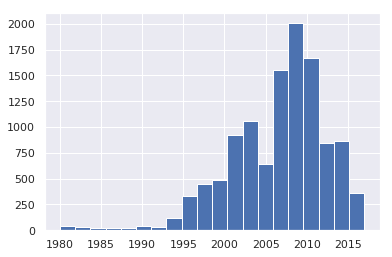

In [120]:
df_train.Year_of_Release.hist(bins=20);

It might be reasonable to bin the years into periods of roughly 5 years and when doing this, also bin the NaN values into *unknown*.

In [121]:
# bin the year_of_release into periods_of_release
bins = [1980, 1995, 2000, 2005, 2010, 2015, 2017]
labels = ['Before 1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015', '2015-2020']
df_train['Periods_of_Release'] = pd.cut(df_train['Year_of_Release'], bins=bins, labels=labels)

# create another category for the unknown release date
df_train['Periods_of_Release'].replace(to_replace=np.nan, value='Unknown', inplace=True)

In [122]:
df_train.Periods_of_Release.value_counts()

2005-2010      4471
2000-2005      2627
2010-2015      2463
1995-2000      1121
Before 1995     470
2015-2020       360
Unknown         189
Name: Periods_of_Release, dtype: int64

In [123]:
# visualize the distribution of categories
#order = ['Unknown', '2015-2020', '2010-2015', '2005-2010',  '2000-2005','1995-2000', 'Before 1995']
#df.Periods_of_Release.value_counts().loc[order].plot(kind='barh');

In [124]:
# drop the original year related column
df_train = df_train.drop(['Year_of_Release'], axis=1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11701 entries, 0 to 11702
Data columns (total 11 columns):
Id                    11701 non-null int64
NA_Sales              11701 non-null float64
Platform              11701 non-null object
Genre                 11701 non-null object
JP_Sales              11701 non-null float64
Critic_Score          5697 non-null float64
Critic_Count          5697 non-null float64
User_Score            5332 non-null float64
User_Count            5332 non-null float64
Rating                11701 non-null object
Periods_of_Release    11701 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


*Test Data*

In [125]:
df_test['Periods_of_Release'] = pd.cut(df_test['Year_of_Release'], bins=bins, labels=labels)

# create another category for the unknown release date
df_test['Periods_of_Release'].replace(to_replace=np.nan, value='Unknown', inplace=True)

df_test = df_test.drop(['Year_of_Release'], axis=1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 10 columns):
Id                    5016 non-null int64
Platform              5016 non-null object
Genre                 5016 non-null object
JP_Sales              5016 non-null float64
Critic_Score          2440 non-null float64
Critic_Count          2440 non-null float64
User_Score            2258 non-null float64
User_Count            2258 non-null float64
Rating                5016 non-null object
Periods_of_Release    5016 non-null object
dtypes: float64(5), int64(1), object(4)
memory usage: 392.0+ KB


*Back to: <a href='#Table of contents'> Table of contents</a>*

**2.4. Handling User and Critic related columns**
<a id='2.4. Handling User and Critic related columns'></a>

*Train Data*

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11701 entries, 0 to 11702
Data columns (total 11 columns):
Id                    11701 non-null int64
NA_Sales              11701 non-null float64
Platform              11701 non-null object
Genre                 11701 non-null object
JP_Sales              11701 non-null float64
Critic_Score          5697 non-null float64
Critic_Count          5697 non-null float64
User_Score            5332 non-null float64
User_Count            5332 non-null float64
Rating                11701 non-null object
Periods_of_Release    11701 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [127]:
df_train = df_train.drop(['Critic_Count', 'User_Score'], axis=1)

In [128]:
# making a copy of the main train dataset
knn_df_train = df_train[['Id', 'NA_Sales', 'JP_Sales', 'Critic_Score', 'User_Count']]
knn_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11701 entries, 0 to 11702
Data columns (total 5 columns):
Id              11701 non-null int64
NA_Sales        11701 non-null float64
JP_Sales        11701 non-null float64
Critic_Score    5697 non-null float64
User_Count      5332 non-null float64
dtypes: float64(4), int64(1)
memory usage: 548.5 KB


In [129]:
knn_df_train.head(3)

,Id,NA_Sales,JP_Sales,Critic_Score,User_Count
0,0,0.00,0.06,81.0,62.0
1,1,0.72,0.00,NaN,NaN
2,2,0.11,0.00,NaN,NaN


In [130]:
from fancyimpute import KNN

# as fancyimpute removes column names, let's work around
knn_df_train_cols = list(knn_df_train)

knn_df_train = pd.DataFrame(KNN(k=9).fit_transform(knn_df_train))

knn_df_train.columns = knn_df_train_cols

Imputing row 1/11701 with 0 missing, elapsed time: 27.932
Imputing row 101/11701 with 2 missing, elapsed time: 27.972
Imputing row 201/11701 with 2 missing, elapsed time: 28.003
Imputing row 301/11701 with 2 missing, elapsed time: 28.025
Imputing row 401/11701 with 2 missing, elapsed time: 28.048
Imputing row 501/11701 with 2 missing, elapsed time: 28.104
Imputing row 601/11701 with 0 missing, elapsed time: 28.134
Imputing row 701/11701 with 2 missing, elapsed time: 28.159
Imputing row 801/11701 with 1 missing, elapsed time: 28.214
Imputing row 901/11701 with 2 missing, elapsed time: 28.241
Imputing row 1001/11701 with 2 missing, elapsed time: 28.265
Imputing row 1101/11701 with 0 missing, elapsed time: 28.287
Imputing row 1201/11701 with 0 missing, elapsed time: 28.315
Imputing row 1301/11701 with 2 missing, elapsed time: 28.333
Imputing row 1401/11701 with 2 missing, elapsed time: 28.354
Imputing row 1501/11701 with 2 missing, elapsed time: 28.391
Imputing row 1601/11701 with 0 missi

In [131]:
knn_df_train.Id = knn_df_train.Id.astype('int64')
knn_df_train.head(3)

,Id,NA_Sales,JP_Sales,Critic_Score,User_Count
0,0,0.00,0.06,81.000000,62.000000
1,1,0.72,0.00,72.493228,47.979812
2,2,0.11,0.00,59.003325,26.409943


In [132]:
df_train_final = pd.merge(left=df_train[['Id', 'Platform', 'Genre', 'Rating', 'Periods_of_Release']], 
                          right=knn_df_train,
                          left_on='Id', right_on='Id')

In [133]:
df_train_final.head()

,Id,Platform,Genre,Rating,Periods_of_Release,NA_Sales,JP_Sales,Critic_Score,User_Count
0,0,PSP,Misc,E,2005-2010,0.00,0.06,81.000000,62.000000
1,1,2600,Shooter,None,Before 1995,0.72,0.00,72.493228,47.979812
2,2,XB,Action,None,2000-2005,0.11,0.00,59.003325,26.409943
3,3,X360,Fighting,T,2005-2010,0.15,0.00,54.000000,19.000000
4,4,DS,Action,None,2005-2010,0.00,0.01,55.359803,19.715805


Let's now walk through all of the four columns we just imputed missing values for and check for extreme outliers:

count    11701.000000
mean        68.535336
std         11.525391
min         13.000000
25%         62.000000
50%         69.375794
75%         76.122578
max         98.000000
Name: Critic_Score, dtype: float64


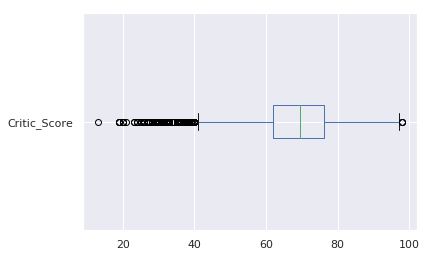

In [134]:
print(df_train_final.Critic_Score.describe())
df_train_final.Critic_Score.plot(kind='box', vert=False);

In [135]:
# remove extreme outliers
df_train_final = df_train_final.drop(df_train_final
                                     [df_train_final.Critic_Score < 35].index, axis=0)

count    11595.000000
mean       151.651626
std        458.646403
min          4.000000
25%         19.000000
50%         45.000000
75%        112.980306
max      10665.000000
Name: User_Count, dtype: float64


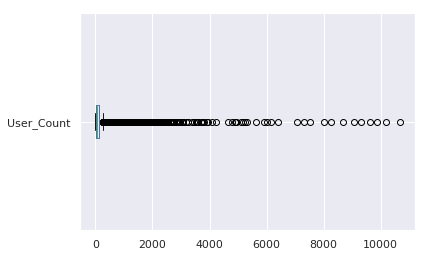

In [136]:
print(df_train_final.User_Count.describe())
df_train_final.User_Count.plot(kind='box', vert=False);

In [137]:
# remove extreme outliers
df_train_final = df_train_final.drop(df_train_final
                                     [df_train_final.User_Count > 112].index, axis=0)

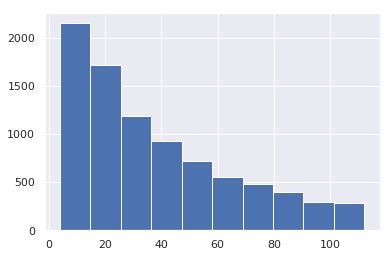

In [138]:
df_train_final.User_Count.hist();

In [139]:
df_train_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8683 entries, 0 to 11700
Data columns (total 9 columns):
Id                    8683 non-null int64
Platform              8683 non-null object
Genre                 8683 non-null object
Rating                8683 non-null object
Periods_of_Release    8683 non-null object
NA_Sales              8683 non-null float64
JP_Sales              8683 non-null float64
Critic_Score          8683 non-null float64
User_Count            8683 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 678.4+ KB


*Test Data*

In [140]:
df_test = df_test.drop(['Critic_Count', 'User_Score'], axis=1)

In [141]:
# making a copy of the main train dataset
knn_df_test = df_test[['Id', 'JP_Sales', 'Critic_Score', 'User_Count']]
knn_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 4 columns):
Id              5016 non-null int64
JP_Sales        5016 non-null float64
Critic_Score    2440 non-null float64
User_Count      2258 non-null float64
dtypes: float64(3), int64(1)
memory usage: 156.8 KB


In [142]:
knn_df_test.head(2)

,Id,JP_Sales,Critic_Score,User_Count
0,11703,10.22,NaN,NaN
1,11704,2.93,58.0,129.0


In [143]:
from fancyimpute import KNN

# as fancyimpute removes column names, let's work around
knn_df_test_cols = list(knn_df_test)

knn_df_test = pd.DataFrame(KNN(k=3).fit_transform(knn_df_test))

knn_df_test.columns = knn_df_test_cols

Imputing row 1/5016 with 2 missing, elapsed time: 3.775
Imputing row 101/5016 with 0 missing, elapsed time: 3.781
Imputing row 201/5016 with 2 missing, elapsed time: 3.786
Imputing row 301/5016 with 0 missing, elapsed time: 3.792
Imputing row 401/5016 with 0 missing, elapsed time: 3.797
Imputing row 501/5016 with 2 missing, elapsed time: 3.802
Imputing row 601/5016 with 0 missing, elapsed time: 3.806
Imputing row 701/5016 with 2 missing, elapsed time: 3.811
Imputing row 801/5016 with 0 missing, elapsed time: 3.817
Imputing row 901/5016 with 2 missing, elapsed time: 3.823
Imputing row 1001/5016 with 0 missing, elapsed time: 3.829
Imputing row 1101/5016 with 0 missing, elapsed time: 3.836
Imputing row 1201/5016 with 1 missing, elapsed time: 3.840
Imputing row 1301/5016 with 2 missing, elapsed time: 3.846
Imputing row 1401/5016 with 0 missing, elapsed time: 3.853
Imputing row 1501/5016 with 0 missing, elapsed time: 3.861
Imputing row 1601/5016 with 1 missing, elapsed time: 3.867
Imputing 

In [144]:
knn_df_test.Id = knn_df_test.Id.astype('int64')
knn_df_test.head(3)

,Id,JP_Sales,Critic_Score,User_Count
0,11703,10.22,73.550250,956.331713
1,11704,2.93,58.000000,129.000000
2,11705,0.28,82.363325,2333.761267


In [145]:
df_test_final = pd.merge(left=df_test[['Id', 'Platform', 'Genre', 'Rating', 'Periods_of_Release']], 
                         right=knn_df_test,
                         left_on='Id', right_on='Id')

In [146]:
df_test_final.head()

,Id,Platform,Genre,Rating,Periods_of_Release,JP_Sales,Critic_Score,User_Count
0,11703,GB,Role-Playing,None,1995-2000,10.22,73.550250,956.331713
1,11704,Wii,Misc,E,2005-2010,2.93,58.000000,129.000000
2,11705,NES,Shooter,None,Before 1995,0.28,82.363325,2333.761267
3,11706,DS,Simulation,None,2000-2005,1.93,85.019017,2545.442085
4,11707,PS3,Action,M,2010-2015,0.98,97.000000,3994.000000


In [147]:
df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 0 to 5015
Data columns (total 8 columns):
Id                    5016 non-null int64
Platform              5016 non-null object
Genre                 5016 non-null object
Rating                5016 non-null object
Periods_of_Release    5016 non-null object
JP_Sales              5016 non-null float64
Critic_Score          5016 non-null float64
User_Count            5016 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 352.7+ KB


*Back to: <a href='#Table of contents'> Table of contents</a>*

**2.7. Handling `Platform` column**
<a id='2.7. Handling Platform column'></a>

In [148]:
#df_train_final.Platform.value_counts()

In [149]:
#df_train_final = df_train_final.groupby('Platform').filter(lambda x: len(x) > 100)

In [150]:
#df_train_final.info()

*Back to: <a href='#Table of contents'> Table of contents</a>*

### 3. Modeling the Train Data 
<a id='3. Modeling the Train Data'></a>

*Preparing Target & Features*

In [151]:
df_training = df_train_final.drop(['Id'], axis=1)

In [152]:
# convert string values in object columns into categorical values
df_training['Platform']           = df_training['Platform'].astype('category')
df_training['Genre']              = df_training['Genre'].astype('category')
df_training['Rating']             = df_training['Rating'].astype('category')
df_training['Periods_of_Release'] = df_training['Periods_of_Release'].astype('category')

df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8683 entries, 0 to 11700
Data columns (total 8 columns):
Platform              8683 non-null category
Genre                 8683 non-null category
Rating                8683 non-null category
Periods_of_Release    8683 non-null category
NA_Sales              8683 non-null float64
JP_Sales              8683 non-null float64
Critic_Score          8683 non-null float64
User_Count            8683 non-null float64
dtypes: category(4), float64(4)
memory usage: 375.5 KB


In [153]:
# define our features 
train_features_1 = df_training.drop(['NA_Sales'], axis=1)

# define our target
target = df_training[['NA_Sales']]

*Recoding Categorical Features*

In [154]:
# create dummy variables of all categorical features
train_features_1 = pd.get_dummies(train_features_1)

*Train-Test-Split*

In [155]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(train_features_1, target, test_size=0.25, random_state=40)

*Scaling the Data*

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

*Training XGBoost*

In [157]:
# create a baseline
booster = xgb.XGBRegressor()

In [68]:
from sklearn.model_selection import GridSearchCV

# create Grid
param_grid = {'n_estimators': [100, 150, 200],
              'learning_rate': [0.01, 0.05, 0.1], 
              'max_depth': [3, 4, 5, 6, 7],
              'colsample_bytree': [0.6, 0.7, 1],
              'gamma': [0.0, 0.1, 0.2]}

# instantiate the tuned random forest
booster_grid_search = GridSearchCV(booster, param_grid, cv=3, n_jobs=-1)

# train the tuned random forest
booster_grid_search.fit(X_train, y_train)

# print best estimator parameters found during the grid search
print(booster_grid_search.best_params_)

KeyboardInterrupt: 

In [158]:
# instantiate xgboost with best parameters
booster_1 = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                             max_depth=5, n_estimators=200, random_state=4)

# train
booster_1.fit(X_train, y_train)

# predict
y_pred_train_1 = booster_1.predict(X_train)
y_pred_test_1  = booster_1.predict(X_test)

In [159]:
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_1))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_pred_test_1)
print(f"r2: {round(r2, 4)}")

RMSE: 0.471
r2: 0.3056


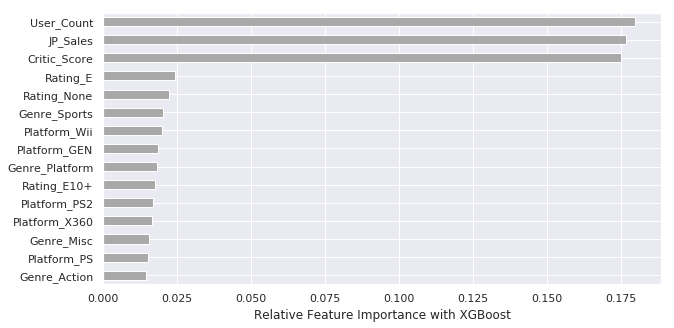

In [161]:
# plot the important features
feat_importances = pd.Series(booster_1.feature_importances_, index=train_features_1.columns)
feat_importances.nlargest(15).sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

*Second Try*

In [162]:
# define our new features 
train_features_2 = df_training.drop(['NA_Sales', 'Platform', 'Genre', 'Rating', 'Periods_of_Release'], axis=1)

In [163]:
# import train_test_split function
from sklearn.model_selection import train_test_split

# split our data
X_train, X_test, y_train, y_test = train_test_split(train_features_2, target, test_size=0.25, random_state=40)

In [164]:
# scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) 
X_test = scaler.transform(X_test)

In [165]:
# instantiate xgboost with best parameters
booster_2 = xgb.XGBRegressor(colsample_bytree=0.6, gamma=0.2, learning_rate=0.05, 
                             max_depth=5, n_estimators=200, random_state=4)

# train
booster_2.fit(X_train, y_train)

# predict
y_pred_train_2 = booster_2.predict(X_train)
y_pred_test_2  = booster_2.predict(X_test)

In [166]:
# import metrics
from sklearn.metrics import mean_squared_error, r2_score

RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test_2))
print(f"RMSE: {round(RMSE, 4)}")

r2 = r2_score(y_test, y_pred_test_2)
print(f"r2: {round(r2, 4)}")

RMSE: 0.5362
r2: 0.1001


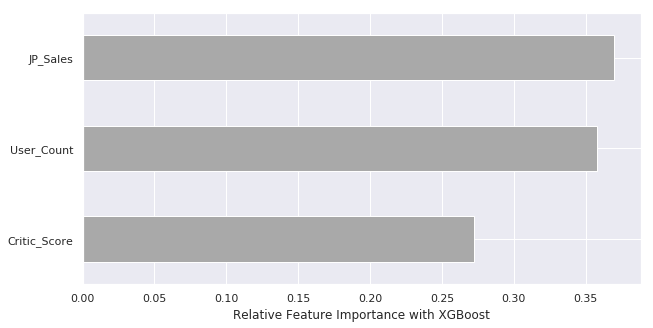

In [170]:
# plot the important features
feat_importances = pd.Series(booster_2.feature_importances_, index=train_features_2.columns)
feat_importances.sort_values().plot(kind='barh', color='darkgrey', figsize=(10,5))
plt.xlabel('Relative Feature Importance with XGBoost');

*Back to: <a href='#Table of contents'> Table of contents</a>*

### 4. Predicting on Test Set
<a id='4. Predicting on Test Set'></a>

*Preparing Target & Features*

In [73]:
df_test_final = df_test_final.drop(['Id'], axis=1)

In [74]:
# convert string values in object columns into categorical values
df_test_final['Platform']           = df_test_final['Platform'].astype('category')
df_test_final['Genre']              = df_test_final['Genre'].astype('category')
df_test_final['Rating']             = df_test_final['Rating'].astype('category')
df_test_final['Periods_of_Release'] = df_test_final['Periods_of_Release'].astype('category')

df_test_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5016 entries, 0 to 5015
Data columns (total 7 columns):
Platform              5016 non-null category
Genre                 5016 non-null category
Rating                5016 non-null category
Periods_of_Release    5016 non-null category
JP_Sales              5016 non-null float64
Critic_Score          5016 non-null float64
User_Count            5016 non-null float64
dtypes: category(4), float64(3)
memory usage: 178.8 KB


In [86]:
# define our features 
features = df_test_final[['JP_Sales', 'Critic_Score', 'User_Count']]

# define our target
#target = df_train_final[["NA_Sales"]]

*Recoding Categorical Features*

In [76]:
# create dummy variables of all categorical features
#features = pd.get_dummies(features)

*Scaling the Data*

In [87]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features) 
#X_test = scaler.transform(X_test)

*Predict*

In [88]:
# predict
na_sales_pred = booster.predict(features)

In [89]:
type(na_sales_pred)

numpy.ndarray

In [90]:
na_sales_pred = pd.DataFrame()
type(na_sales_pred)

pandas.core.frame.DataFrame

In [91]:
na_sales_pred.head()

""
